# Classifying Tweet Emotions

In [48]:
# Import necessary modules
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 160)

## Understanding Data

In [32]:
df = pd.read_csv('data/text_emotion.csv')

In [3]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.describe(include='all')

,tweet_id,sentiment,author,content
count,4.000000e+04,40000,40000,40000
unique,NaN,13,33871,39827
top,NaN,neutral,MissxMarisa,I just received a mothers day card from my lov...
freq,NaN,8638,23,14
mean,1.845184e+09,NaN,NaN,NaN
std,1.188579e+08,NaN,NaN,NaN
min,1.693956e+09,NaN,NaN,NaN
25%,1.751431e+09,NaN,NaN,NaN
50%,1.855443e+09,NaN,NaN,NaN
75%,1.962781e+09,NaN,NaN,NaN


In [6]:
# Print the number of unique values of tweet_id
df.tweet_id.nunique()

40000

Tweet id is unique as expected. It seems that some authors tweeted multiple times. 

`sentiment` is the label. There are 13 emotions in this column.

Some values in the `content` column appear more than once. There are **same** tweets for some oft the `tweet_id`s.

## Data Preparation

### Univariate Analysis

#### Sentiment

In [18]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

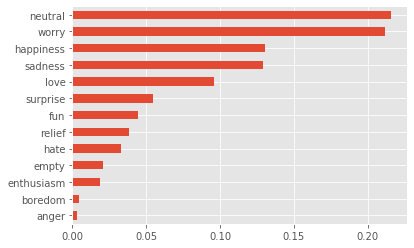

In [38]:
plt.style.use('ggplot')

df.sentiment.value_counts(normalize=True).sort_values(ascending=True).plot.barh()

#### Author

In [39]:
df.author.value_counts()

MissxMarisa       23
ChineseLearn      22
MiDesfileNegro    19
erkagarcia        19
lost_dog          18
                  ..
NatPivac77         1
energizerame       1
Lijaaa             1
camillawalker      1
KlaBrost           1
Name: author, Length: 33871, dtype: int64

In [51]:
df[df.author=='MissxMarisa']

,tweet_id,sentiment,author,content
260,1957023061,surprise,MissxMarisa,@freshypanda Im sorry I don't think I stick o...
333,1957041812,hate,MissxMarisa,"@meganmansyn Hahahaha! It's not horrible, if o..."
1941,1957434995,neutral,MissxMarisa,@tsarnick This year
2143,1957479923,worry,MissxMarisa,@Zobi09 I'm concerned for that family
2298,1957514298,neutral,MissxMarisa,"@tsarnick Yeah, that was my thumb last night. ..."
21267,1694202109,love,MissxMarisa,@shortyyyy Thank you I liked Joe's clothes' b...
21560,1694256899,surprise,MissxMarisa,@Zanna85 Bill can take me to Fangtasia and hit...
22574,1694455792,happiness,MissxMarisa,@Zobi09 The cast of True Blood was there
22773,1694493269,sadness,MissxMarisa,"@Zobi09 Haha yes I do it's hard work, too! I ..."
23154,1694568031,neutral,MissxMarisa,@TheLonely California


#### Content

In [46]:
df.content.value_counts()[df.content.value_counts()>1]

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9                     14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                                      13
Happy Mothers Day                                                                                                                10
Happy Mother's Day!                                                                                                              10
happy mother's day                                                                                                                8
                                                                                                                                 ..
@andyclemmensen have you seen the game on the website?! awesomness!!! go on msn                                                   2
@thecompletes seen u a couple of times. Liked it                            

Some tweets are tweeted multiple times by different users. These may also be Retweets. There is not any information about RTs in the dataset.

In [50]:
df[df.content=='I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9']

,tweet_id,sentiment,author,content
33496,1752619550,love,unifiedclock,I just received a mothers day card from my lov...
33693,1752674435,love,TheOrakill,I just received a mothers day card from my lov...
33874,1752725133,worry,charlesstinger,I just received a mothers day card from my lov...
34071,1752774341,love,jamesbankso,I just received a mothers day card from my lov...
34298,1752824798,love,sarahmarche,I just received a mothers day card from my lov...
34480,1752873814,love,xmanoxx,I just received a mothers day card from my lov...
34672,1752920582,love,oblongshmoblong,I just received a mothers day card from my lov...
34861,1752965288,love,lilpiggynose,I just received a mothers day card from my lov...
35051,1753009856,love,unitedstatesfre,I just received a mothers day card from my lov...
35232,1753052362,love,unifiedclock,I just received a mothers day card from my lov...


Interestingly, for the same tweet there are different sentiments in the label column. There may be more false labels in the dataset!

### Multivariete A.

#### Mentions

In [14]:
# Tweets that contain "mentions"
df.content.str.contains("@\w+")

0         True
1        False
2        False
3        False
4         True
         ...  
39995     True
39996    False
39997    False
39998     True
39999     True
Name: content, Length: 40000, dtype: bool

In [18]:
df.content.str.contains("@\w+").mean()

0.473925

Almost half of the tweets contain mentions. This does not seem normal. Let's see the distribution of emotions through mentioned tweets.

In [25]:
df.groupby('sentiment').content.apply(lambda x: x.str.contains("@\w+").mean()).sort_values()

sentiment
boredom       0.273743
hate          0.375661
sadness       0.400000
anger         0.427273
worry         0.433266
relief        0.441678
empty         0.488513
happiness     0.491265
love          0.504425
enthusiasm    0.508564
neutral       0.526395
surprise      0.527663
fun           0.546734
Name: content, dtype: float64

People possibly tend to mention others more when they have positive sentiment. Let's investigate this result further.

In [33]:
# Create a sentiment dictionary to map EMOTIONS to SENTIMENTS.
sentiment_dict = {'boredom': 'negative',
                  'hate': 'negative',
                  'sadness': 'negative',
                  'anger': 'negative',
                  'worry': 'negative',
                  'relief': 'positive',
                  'empty': 'neutral',
                  'happiness': 'positive',
                  'love': 'positive',
                  'enthusiasm': 'positive',
                  'neutral': 'neutral',
                  'surprise':'positive',
                  'fun': 'positive'
                 }
df['polarity'] = df.sentiment.map(sentiment_dict)

In [34]:
# Mentions by sentiment_new
df.groupby('polarity').content.apply(lambda x: x.str.contains("@\w+").mean()).sort_values()

polarity
negative    0.415070
positive    0.502124
neutral     0.523085
Name: content, dtype: float64

#### Hashtags

In [23]:
# Tweets that contain "hashtags"
df.content.str.contains("#\w+").mean()

0.01975

Only a small portion of tweets contain `#` (hashtag) s

#### Polarity

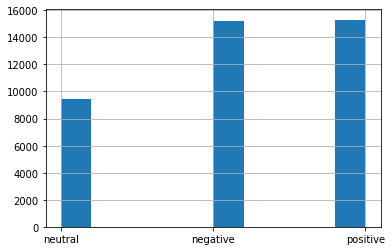

In [31]:
df.polarity.hist()

The frequencies of _sentiments_ appear to be more balanced when compared to that of the _emotions_.

#### Num of Characters

In [39]:
# Describe the length of the tweets in the contents column.
df.content.str.len().describe()

count    40000.000000
mean        73.405550
std         36.558015
min          1.000000
25%         43.000000
50%         69.000000
75%        103.000000
max        167.000000
Name: content, dtype: float64

Twitter has recently change the _character limit_ from 140 to 280. The dataset is possibly created before the change. However, some tweets contain more than 140 characters. I initially suspected that these are the ones with links. Yet the reason seems to be 'special entities' such as `&quot;` or "`&amp;` which are rendered as -&quot;- and -&amp;- respectively. [Special Entities](http://www.htmlhelp.com/reference/html40/entities/special.html)

In [49]:
df[df.content.str.len()>140].sample(10)

,tweet_id,sentiment,author,content,polarity
6657,1961410317,sadness,loew01,"wow, I didn't realized that there is a limit to the &quot;more&quot; button. That sucks... I guess two days is the max to not sign in to twitter. !",negative
12498,1963588292,love,Chriztophe,"met a cute girl at mighty taco.I'm ordering(no cheese, no sour cream, etc)&amp; she's like&quot;it's ok, I'm Vegan too!&quot;(insert hot wink)too young",positive
36840,1753382411,love,love_yazmo,you know you love your mom when you stay up this late just to wrap her gifts (which look glorious) &amp; hand-make a card.. happy mothers day,positive
20857,1694126085,neutral,byhuy,@ducban &quot;nhi?p ?nh gia&quot; ? ?ï¿½y lï¿½ ch? cï¿½c b?n t? x?ng lï¿½ &quot;?am mï¿½ nhi?p ?nh&quot;. Cï¿½n ng??i thï¿½ch ch?p ?nh thï¿½ 99% dï¿½n s? r?i,neutral
26385,1695376835,neutral,geminimag,TalkingWithTami morning Ms. Tammie! Your fam looked adorable in Family Circle I bought it &amp; was like &quot;see honey? I talked to her&quot; LOL,neutral
12841,1963743820,neutral,ETown_Lesley,4am Hubby's alarm-song playing was &quot;Blame it on the Alcohol&quot; Of course I couldn't get back to sleep after cause thinking of Joe on cruise,neutral
11587,1963282166,happiness,RandyAmberTK,@mileycyrus they closed the voting...all u can vote for now is best movie Hope you win it! My 4 y/o Daughter lovesss 2 sing &quot;The Climb&quot;,positive
24773,1694928700,sadness,coffeegeek,Illy's note in the book: &quot;From one 'geek' to another - keep up the good work!&quot; sigh. He is missed - and he was great for espresso.,negative
30761,1751714638,neutral,BrandyLionWine,"@stuartdavis C'mon, we're talking about philos-ophy - the love of wisdom. I need a &quot;mat&quot; - a context to intersubjectively &quot;ground&quot; it.",neutral
32304,1752256387,neutral,TimeOutMom,@MyPreciousKid - i can do &quot;Nana&quot; or &quot;Nana Rocks&quot; for you in rhinestones &amp; do printed onesies for them &quot;my nana loves me&quot;,neutral


### Check Language

In [73]:
from textblob import TextBlob
# b = TextBlob("merhaba")
# b.detect_language()

from time import sleep

def detect_lan(tweet):

    sleep(1)
    try:
        return TextBlob(tweet).detect_language()
    except:
        return np.nan

In [74]:
df.content.head().apply(lambda tweet: TextBlob(tweet).detect_language())

HTTPError: HTTP Error 429: Too Many Requests

In [68]:
import spacy
from spacy_langdetect import LanguageDetector

ModuleNotFoundError: No module named 'spacy_langdetect'

In [62]:
df.content.apply(detect_lan)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39995   NaN
39996   NaN
39997   NaN
39998   NaN
39999   NaN
Name: content, Length: 40000, dtype: float64

### Transforming Data - Create X and Y

In [ ]:
# Create features and target
X = df.content
y = df.sentiment

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=57)

### Vectorizing Tweets

## Model